In [1]:
import pandas as pd
import numpy as np
from joblib import load
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns


# Load Isolation Forest model and scaler
scaler = load('./model/iso_scaler.joblib')
iso_model = load('./model/iso_model.joblib')

# Load datasets
#df_val = pd.read_csv("./data/validate.csv")
df_val = pd.read_csv("./data/devAll2_prepared.csv")

In [2]:
df_val

timestamp  devID       soil  rain       temp  \
0       2025-05-02 11:42:00.384119  102.0  22.200001   0.0  34.549099   
1       2025-05-02 11:42:06.635276  101.0  28.799999   0.0  34.290073   
2       2025-05-02 11:42:11.034615  102.0  22.200001   0.0  34.506374   
3       2025-05-02 11:42:18.056572  101.0  28.799999   0.0  34.266041   
4       2025-05-02 11:42:21.675224  102.0  22.200001   0.0  34.485012   
...                            ...    ...        ...   ...        ...   
301186     2025-06-29 20:25:27.980  101.0  27.900000   0.0  29.101625   
301187     2025-06-29 20:25:48.980  102.0  25.600000   0.0  29.908064   
301188     2025-06-29 20:26:01.100  102.0  25.600000   0.0  29.349968   
301189     2025-06-29 20:26:02.150  101.0  27.900000   0.0  29.050890   
301190     2025-06-29 20:26:13.090  101.0  27.900000   0.0  30.020216   

             humi        geo       lat        lng  
0       61.175941   3.323395  8.637964  99.898933  
1       62.429081  14.532875  8.637999  99.899010  
2       61.542152  14.766250  8.637963  99.898933  
3       64.082787  14.673310  8.637998  99.899010  
4       61.767223   3.242806  8.637963  99.898933  
...           ...        ...       ...        ...  
301186  81.113754   2.490953  8.638010  99.898972  
301187  77.426796   3.856516  8.637931  99.898941  
301188  80.005569   2.614293  8.637931  99.898949  
301189  81.302589   8.617684  8.638011  99.898972  
301190  76.324333   9.696708  8.638011  99.898972  

[301191 rows x 9 columns]

In [3]:
#df_val  = pd.concat([df1, df2], ignore_index=True)
df_val.describe()

devID           soil           rain           temp  \
count  301191.000000  301191.000000  301191.000000  301191.000000   
mean      101.503282      48.952394       0.205600      29.871124   
std         0.499990      10.397376       1.761622       3.193456   
min       101.000000      21.100000       0.000000      24.238958   
25%       101.000000      44.200001       0.000000      27.368584   
50%       102.000000      50.400002       0.000000      28.508812   
75%       102.000000      57.799999       0.000000      32.749290   
max       102.000000      66.599998      41.630600      38.984512   

                humi            geo            lat            lng  
count  301191.000000  301191.000000  301191.000000  301191.000000  
mean       75.252266       8.128838       8.637978      99.898949  
std         8.565651       6.716052       0.000038       0.001335  
min        43.418247       0.000000       8.637330      99.166664  
25%        69.429153       3.009754       8.637945      99.898926  
50%        79.240715       4.383256       8.637974      99.898949  
75%        81.176704      13.366670       8.638014      99.898972  
max        88.510567      32.062466       8.638361      99.900078

## Threshold

In [4]:
#def rule_based_risk(row):
#   score = 0
#   
#   # Rainfall (mm/h)
#   if row['rain'] > 25:
#       score += 2
#   elif row['rain'] > 10:
#       score += 1
#
#   # Soil moisture (%)
#   if row['soil'] > 60:
#       score += 2
#   elif row['soil'] > 45:
#       score += 1
#
#   # Temperature (¬∞C)
#   if row['temp'] < 27:
#       score += 2
#   elif row['temp'] < 32:
#       score += 1
#
#   # Humidity (%)
#   if row['humi'] > 80:
#       score += 2
#   elif row['humi'] > 65:
#       score += 1
#
#   # Geophone (Hz)
#   if row['geo'] > 25:
#       score += 1
#   elif row['geo'] > 10:
#       score += 0.5
#
#   if score >= 6:
#       return "Critical"
#   elif score >= 3:
#       return "Warning"
#   else:
#       return "Normal"
#
#feature_cols = ['soil', 'rain', 'temp', 'humi', 'geo']
#X_val = df_val[feature_cols].values
#X_val_scaled = scaler.transform(X_val)
#
#df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)
#
#crit_thresh = np.percentile(df_val['anomaly_score'], 0.5)
#warn_thresh = np.percentile(df_val['anomaly_score'], 5)
#
#def model_based_risk(score):
#   if score < crit_thresh:
#       return "Critical"
#   elif score < warn_thresh:
#       return "Warning"
#   else:
#       return "Normal"
#
#df_val['model_risk'] = df_val['anomaly_score'].apply(model_based_risk)
#df_val['rule_risk'] = df_val.apply(rule_based_risk, axis=1)
#
#risk_levels = {'Normal': 0, 'Warning': 1, 'Critical': 2}
#
#def combine_weighted_risks(model_risk, rule_risk, w_model=0.6, w_rule=0.4):
#   score = w_model * risk_levels[model_risk] + w_rule * risk_levels[rule_risk]
#   
#   if score >= 1.5:
#       return "Critical"
#   elif score >= 0.5:
#       return "Warning"
#   else:
#       return "Normal"
#
#df_val['predicted_risk'] = df_val.apply(
#    lambda row: combine_weighted_risks(row['model_risk'], row['rule_risk']),
#    axis=1
#)
#
#print(df_val[['soil', 'rain', 'temp', 'humi', 'geo',
#              'anomaly_score', 'model_risk', 'rule_risk', 'predicted_risk']].head())

In [5]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á features
feature_cols = ['soil', 'rain', 'temp', 'humi', 'geo']
X_val = df_val[feature_cols].values
X_val_scaled = scaler.transform(X_val)

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì anomaly score ‡πÅ‡∏•‡∏∞‡∏à‡∏±‡∏î‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡πà‡∏¢‡∏á
df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)


crit_thresh = np.percentile(df_val['anomaly_score'], 0.25)
warn_thresh = np.percentile(df_val['anomaly_score'], 0.75)

#crit_thresh = -0.08836725668910894 
#warn_thresh = 0.025479414819127754 

def classify_risk(score):
    if score < crit_thresh:
        return "Critical"
    elif score < warn_thresh:
        return "Warning"
    else:
        return "Normal"

df_val['predicted_risk'] = df_val['anomaly_score'].apply(classify_risk)

print("crit_thresh:", np.percentile(df_val['anomaly_score'], 0.5))
print("warn_thresh:", np.percentile(df_val['anomaly_score'], 5))

crit_thresh: -0.0886865249280855
warn_thresh: 0.0255929274758136


In [6]:
critical_group = df_val[df_val['anomaly_score'] < crit_thresh]
print("critical_group")
print(critical_group[feature_cols].describe())

critical_group
             soil        rain        temp        humi         geo
count  753.000000  753.000000  753.000000  753.000000  753.000000
mean    57.151129   23.138624   26.753101   81.474130   19.783348
std      7.193897    8.780170    0.950615    2.412488    9.747085
min     21.600000    0.000000   25.013353   49.912872    0.656139
25%     53.500000   15.925800   26.137560   80.541542   15.859430
50%     55.599998   21.513800   26.644924   81.043182   19.187490
75%     63.799999   31.851601   27.424660   81.581062   31.983122
max     66.400002   41.630600   37.011139   88.413284   32.057621


In [7]:
warn_group = df_val[(df_val['anomaly_score'] < warn_thresh) & (df_val['anomaly_score'] >= crit_thresh) ]
print("warn_group")
print(warn_group[feature_cols].describe())

warn_group
              soil         rain         temp         humi          geo
count  1506.000000  1506.000000  1506.000000  1506.000000  1506.000000
mean     49.359960    12.531257    29.174735    74.769551    16.051197
std      14.362243     9.250053     4.356960    12.896890     9.302825
min      21.200001     0.000000    24.949266    43.418247     0.639543
25%      40.149999     5.308600    26.547453    79.913063     8.944082
50%      54.000000    12.852400    27.216372    80.758987    16.651347
75%      61.000000    17.881599    28.046179    81.394142    19.363396
max      66.599998    34.366199    38.864346    88.392303    32.061317


In [8]:
normal_group = df_val[df_val['anomaly_score'] >= warn_thresh]
print("normal_group")
print(normal_group[feature_cols].describe())

normal_group
                soil           rain           temp           humi  \
count  298932.000000  298932.000000  298932.000000  298932.000000   
mean       48.929689       0.085736      29.882487      75.239025   
std        10.372222       0.630492       3.185956       8.542478   
min        21.100000       0.000000      24.238958      46.771420   
25%        44.200001       0.000000      27.376595      69.377655   
50%        50.400002       0.000000      28.527504      79.215919   
75%        57.799999       0.000000      32.770660      81.169552   
max        66.400002      15.367000      38.984512      88.510567   

                 geo  
count  298932.000000  
mean        8.059568  
std         6.641412  
min         0.000000  
25%         3.003536  
50%         4.346100  
75%        13.255363  
max        32.062466  


C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\2053204387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_val, x='predicted_risk', order=['Normal', 'Warning', 'Critical'], palette='Set2')


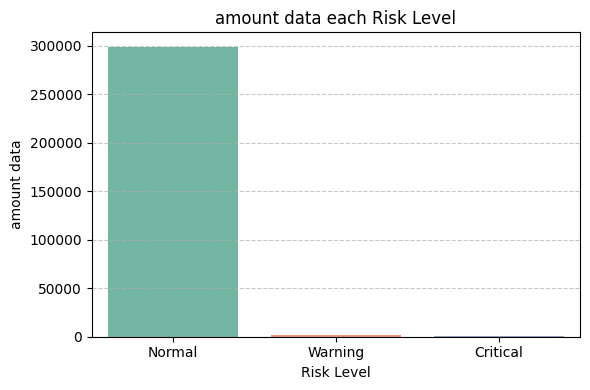

In [9]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df_val, x='predicted_risk', order=['Normal', 'Warning', 'Critical'], palette='Set2')

plt.title('amount data each Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('amount data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribution of Anomaly Scores

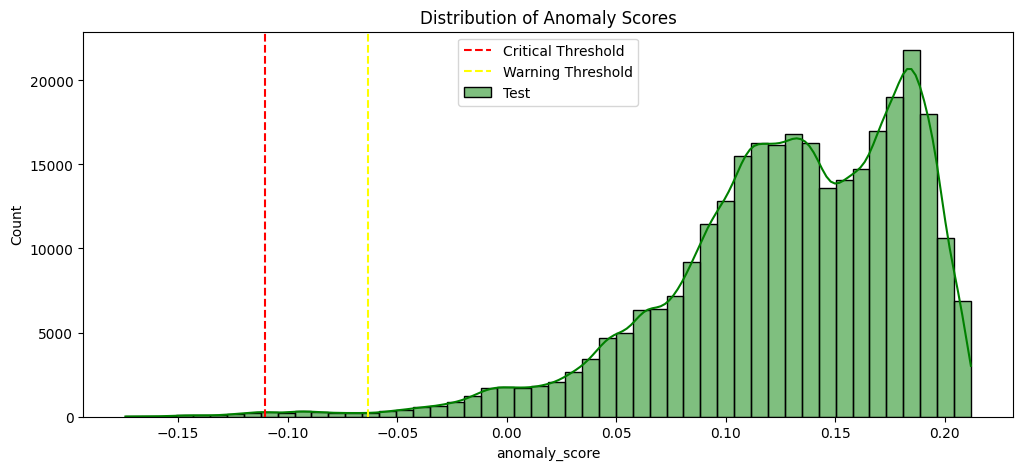

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(df_val['anomaly_score'], bins=50, kde=True, color='green', label='Test')
plt.axvline(crit_thresh, color='red', linestyle='--', label='Critical Threshold')
plt.axvline(warn_thresh, color='yellow', linestyle='--', label='Warning Threshold')
plt.legend()
plt.title('Distribution of Anomaly Scores')
plt.show()



## Z-score Outlier

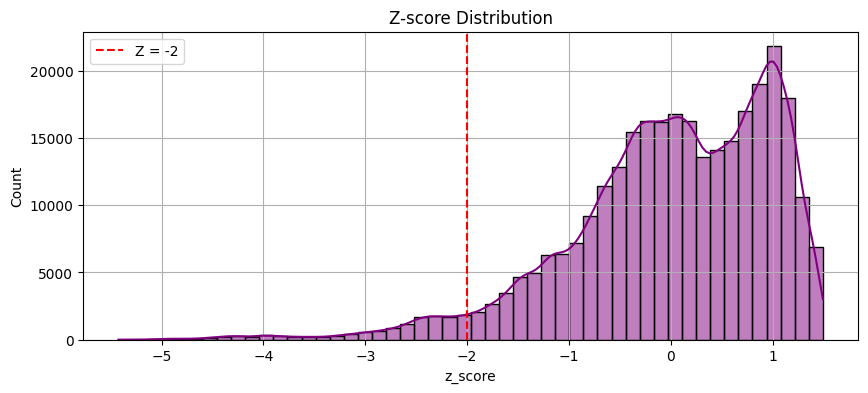

In [11]:
# ==== Z-score Outlier ====

mean_score = df_val['anomaly_score'].mean()
std_score = df_val['anomaly_score'].std()
df_val['z_score'] = (df_val['anomaly_score'] - mean_score) / std_score
df_val['z_outlier'] = df_val['z_score'].apply(lambda z: 'Anomaly' if z < -2 else 'Normal')

plt.figure(figsize=(10,4))
sns.histplot(df_val['z_score'], kde=True, bins=50, color='purple')
plt.axvline(-2, color='red', linestyle='--', label='Z = -2')
plt.title("Z-score Distribution")
plt.legend()
plt.grid(True)
plt.show()

## Mahalanobis Distance

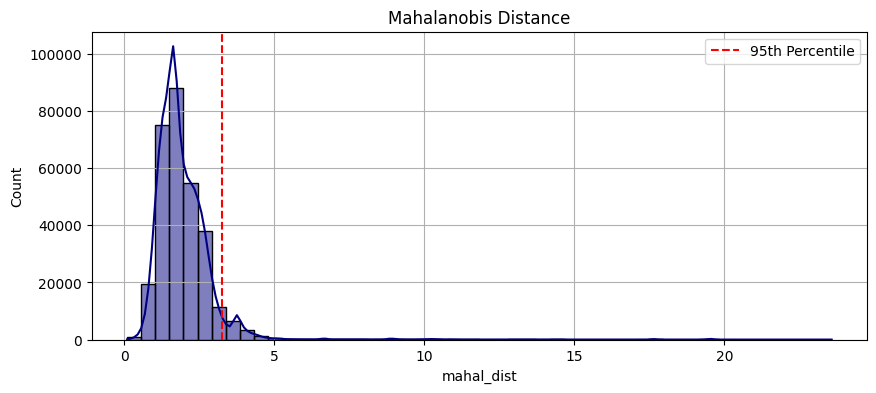

In [12]:
mean_vec = np.mean(X_val_scaled, axis=0)
cov_matrix = np.cov(X_val_scaled, rowvar=False)
inv_covmat = np.linalg.inv(cov_matrix)

df_val['mahal_dist'] = [mahalanobis(x, mean_vec, inv_covmat) for x in X_val_scaled]
mahal_thresh = np.percentile(df_val['mahal_dist'], 95)
df_val['mahal_outlier'] = df_val['mahal_dist'].apply(lambda d: 'Anomaly' if d > mahal_thresh else 'Normal')

plt.figure(figsize=(10,4))
sns.histplot(df_val['mahal_dist'], bins=50, kde=True, color='navy')
plt.axvline(mahal_thresh, color='red', linestyle='--', label='95th Percentile')
plt.title("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

## Percentile Threshold 5%

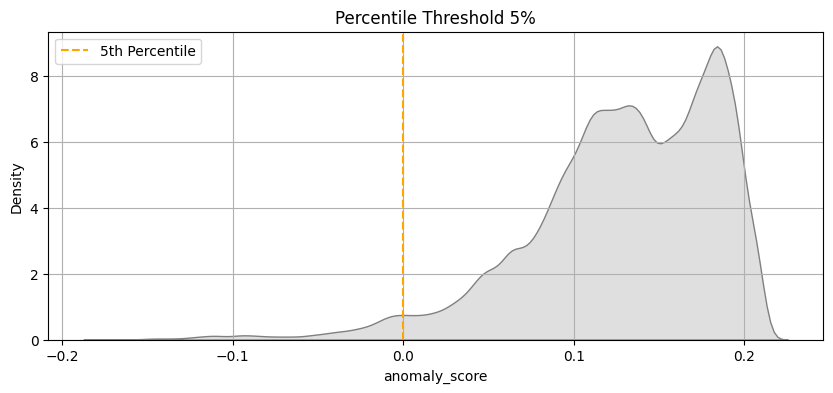

In [13]:
percentile = np.percentile(df_val['anomaly_score'], 3)
df_val['percentile_outlier'] = df_val['anomaly_score'].apply(lambda s: 'Anomaly' if s < percentile else 'Normal')

plt.figure(figsize=(10,4))
sns.kdeplot(df_val['anomaly_score'], fill=True, color='gray')
plt.axvline(percentile, color='orange', linestyle='--', label='5th Percentile')
plt.title("Percentile Threshold 5%")
plt.legend()
plt.grid(True)
plt.show()

## PCA

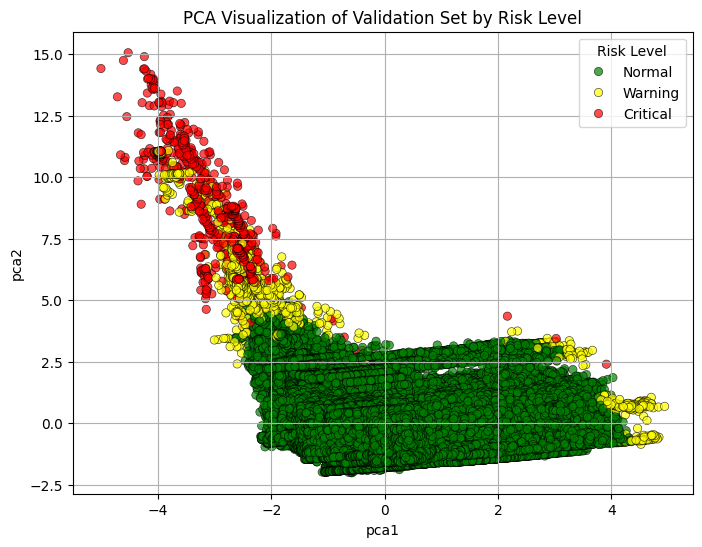

In [14]:
# Fit PCA
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val_scaled)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡πà‡∏≤ PCA ‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏Ç‡πâ‡∏≤ df_val
df_val['pca1'] = X_val_pca[:, 0]
df_val['pca2'] = X_val_pca[:, 1]

# Map ‡∏™‡∏µ‡πÅ‡∏ö‡∏ö‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÄ‡∏≠‡∏á
custom_palette = {
    'Normal': 'green',
    'Warning': 'yellow',
    'Critical': 'red'
}

# ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_val,
    x='pca1', y='pca2',
    hue='predicted_risk',
    palette=custom_palette,
    alpha=0.7,
    edgecolor='black'
)
plt.title('PCA Visualization of Validation Set by Risk Level')
plt.grid(True)
plt.legend(title='Risk Level')
plt.show()

In [15]:
explained_var = pca.explained_variance_ratio_
print(f"PCA explain {explained_var[0]*100:.2f}% and {explained_var[1]*100:.2f}% of data")


PCA explain 39.97% and 22.23% of data


In [16]:
# ‡∏î‡∏π‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡∏•‡∏∞ feature ‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡∏Å‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞ principal component ‡πÄ‡∏ó‡πà‡∏≤‡πÑ‡∏´‡∏£‡πà x=PC1 y=PC2
pca_df = pd.DataFrame(pca.components_, columns=feature_cols, index=["PC1", "PC2"])
print(pca_df.T.sort_values("PC1", ascending=False))  # ‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡∏ï‡∏≤‡∏°‡∏ú‡∏•‡∏ï‡πà‡∏≠‡πÅ‡∏Å‡∏ô X


           PC1       PC2
temp  0.687328  0.109401
geo  -0.008019  0.685443
rain -0.136205  0.592757
soil -0.229066  0.381586
humi -0.675643 -0.145708


## Summary Statistics

In [17]:
print("\n== Z-score Outlier ==")
print(df_val['z_outlier'].value_counts())


== Z-score Outlier ==
z_outlier
Normal     288331
Anomaly     12860
Name: count, dtype: int64


In [18]:
print("\n== Percentile Outlier ==")
print(f"5th Percentile Threshold: {percentile:.4f}")
print(df_val['percentile_outlier'].value_counts())


== Percentile Outlier ==
5th Percentile Threshold: 0.0001
percentile_outlier
Normal     292155
Anomaly      9036
Name: count, dtype: int64


In [19]:
print("\n== Mahalanobis Outlier ==")
print(f"95th Percentile of Mahalanobis Distance: {mahal_thresh:.2f}")
print(df_val['mahal_outlier'].value_counts())


== Mahalanobis Outlier ==
95th Percentile of Mahalanobis Distance: 3.27
mahal_outlier
Normal     286131
Anomaly     15060
Name: count, dtype: int64


In [20]:
overlap = df_val[
    (df_val['z_outlier'] == 'Anomaly') &
    (df_val['percentile_outlier'] == 'Anomaly') &
    (df_val['mahal_outlier'] == 'Anomaly')
]
print(f"Anomalies detected by ALL 3 methods: {len(overlap)}")


Anomalies detected by ALL 3 methods: 7103


In [21]:
df_val['combined_outlier'] = df_val.apply(
    lambda row: (
        row['z_outlier'] == 'Anomaly' or
        row['percentile_outlier'] == 'Anomaly' or
        row['mahal_outlier'] == 'Anomaly'
    ),
    axis=1
)

print("\n== Combined Outlier ==")
print(df_val['combined_outlier'].value_counts())


== Combined Outlier ==
combined_outlier
False    281832
True      19359
Name: count, dtype: int64


In [22]:
print("\n== Mean Feature Values by Risk Level ==")
print(df_val.groupby('predicted_risk')[feature_cols].mean())


== Mean Feature Values by Risk Level ==
                     soil       rain       temp       humi        geo
predicted_risk                                                       
Critical        57.151129  23.138624  26.753101  81.474130  19.783348
Normal          48.929689   0.085736  29.882487  75.239025   8.059568
Warning         49.359960  12.531257  29.174735  74.769551  16.051197


In [23]:
print("\n== Risk Level ==")
print(df_val['predicted_risk'].value_counts())


== Risk Level ==
predicted_risk
Normal      298932
Warning       1506
Critical       753
Name: count, dtype: int64


In [24]:
def risk_from_combined(row):
    if row['combined_outlier']:
        if row['anomaly_score'] < crit_thresh:
            return 'Critical'
        elif row['anomaly_score'] < warn_thresh:
            return 'Warning'
        else:
            return 'Warning'  
    return 'Normal'

df_val['risk_level_final'] = df_val.apply(risk_from_combined, axis=1)
print("\n== risk level final ==")
print(df_val['risk_level_final'].value_counts())


== risk level final ==
risk_level_final
Normal      281832
Warning      18606
Critical       753
Name: count, dtype: int64


In [25]:
print("\n== Risk final Proportion ==")
print("Validation:", df_val['risk_level_final'].value_counts(normalize=True))


== Risk final Proportion ==
Validation: risk_level_final
Normal      0.935725
Warning     0.061775
Critical    0.002500
Name: proportion, dtype: float64


In [26]:
print("\n== Risk Proportion ==")
print("Validation:", df_val['predicted_risk'].value_counts(normalize=True))


== Risk Proportion ==
Validation: predicted_risk
Normal      0.9925
Warning     0.0050
Critical    0.0025
Name: proportion, dtype: float64


##  Signal-to-Noise Ratio (SNR)

In [27]:
def compute_snr(signal):
    mean_signal = np.mean(signal)
    std_signal = np.std(signal)
    return mean_signal / std_signal if std_signal != 0 else 0

for col in feature_cols:
    snr = compute_snr(df_val[col])
    print(f"SNR of {col}: {snr:.2f}")


SNR of soil: 4.71
SNR of rain: 0.12
SNR of temp: 9.35
SNR of humi: 8.79
SNR of geo: 1.21


In [28]:
for col in feature_cols:
    normal_snr = compute_snr(df_val[df_val['predicted_risk'] == 'Normal'][col])
    anomaly_snr = compute_snr(df_val[df_val['predicted_risk'] != 'Normal'][col])
    print(f"{col}: Normal SNR={normal_snr:.2f}, Anomaly SNR={anomaly_snr:.2f}")


soil: Normal SNR=4.72, Anomaly SNR=4.01
rain: Normal SNR=0.14, Anomaly SNR=1.55
temp: Normal SNR=9.38, Anomaly SNR=7.51
humi: Normal SNR=8.81, Anomaly SNR=6.95
geo: Normal SNR=1.21, Anomaly SNR=1.80


## Mean Absolute Error (MAE)

In [29]:
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
interval = df_val['timestamp'].diff().median()
print(f"Sampling interval: {interval}")


Sampling interval: 0 days 00:00:06.130000


In [30]:
window_size = int(pd.Timedelta('1H') / interval)
print(f"Rolling window size for 1 hour: {window_size}")


Rolling window size for 1 hour: 587


C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\504831528.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  window_size = int(pd.Timedelta('1H') / interval)


In [31]:
interval = df_val['timestamp'].diff().median()
window_size = int(pd.Timedelta('1H') / interval)

print(f"Using rolling window size = {window_size} for 1 hour")

for col in feature_cols:
    df_val[f'{col}_roll_mean'] = df_val[col].rolling(window=window_size, center=True).mean()
    df_val[f'{col}_mae'] = (df_val[col] - df_val[f'{col}_roll_mean']).abs()

    mae = df_val[f'{col}_mae'].mean()
    print(f"MAE for {col} (vs rolling mean): {mae:.2f}")


Using rolling window size = 587 for 1 hour
MAE for soil (vs rolling mean): 1.97
MAE for rain (vs rolling mean): 0.15
MAE for temp (vs rolling mean): 0.42
MAE for humi (vs rolling mean): 1.76
MAE for geo (vs rolling mean): 5.23


C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\2248412977.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  window_size = int(pd.Timedelta('1H') / interval)


## Cross-Correlation

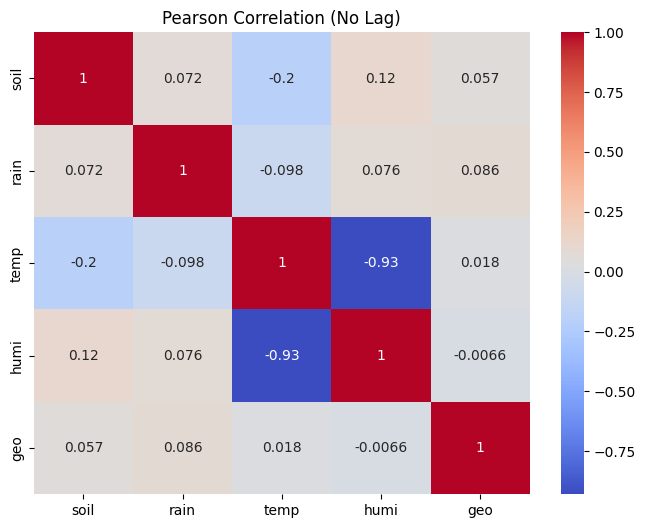

In [32]:
corr_matrix = df_val[feature_cols]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation (No Lag)")
plt.show()

In [33]:
def lag_corr(x, y, max_lag=window_size*10):
    lags = []
    corrs = []
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            corr = np.corrcoef(x[:lag], y[-lag:])[0, 1]
        elif lag > 0:
            corr = np.corrcoef(x[lag:], y[:-lag])[0, 1]
        else:
            corr = np.corrcoef(x, y)[0, 1]
        lags.append(lag)
        corrs.append(corr)
    return lags, corrs


C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\1202832202.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = df_val['rain'].fillna(method='ffill').values
C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\1202832202.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df_val['soil'].fillna(method='ffill').values


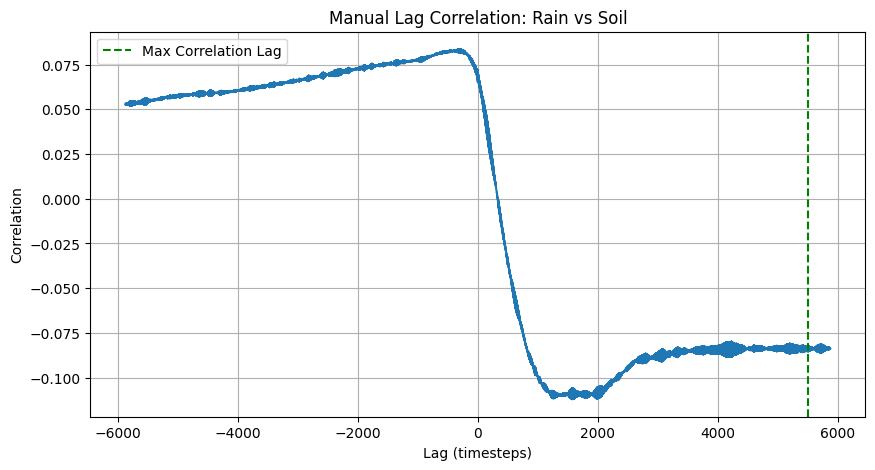

In [34]:
x = df_val['rain'].fillna(method='ffill').values
y = df_val['soil'].fillna(method='ffill').values
lags, corrs = lag_corr(x, y, max_lag=window_size*10)

plt.figure(figsize=(10, 5))
plt.plot(lags, corrs)
plt.axvline(x=np.argmax(corrs) - 60, color='green', linestyle='--', label='Max Correlation Lag')
plt.title("Manual Lag Correlation: Rain vs Soil")
plt.xlabel("Lag (timesteps)")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\3179048846.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = df_val['rain'].fillna(method='ffill').values
C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\3179048846.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df_val['soil'].fillna(method='ffill').values


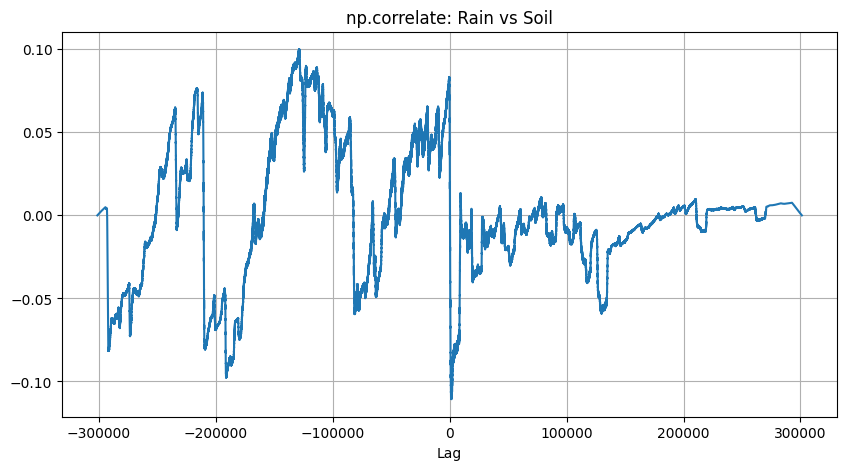

In [35]:
x = df_val['rain'].fillna(method='ffill').values
y = df_val['soil'].fillna(method='ffill').values

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

corr = np.correlate(x, y, mode='full') / len(x)
lags = np.arange(-len(x)+1, len(x))

plt.figure(figsize=(10,5))
plt.plot(lags, corr)
plt.title("np.correlate: Rain vs Soil")
plt.xlabel("Lag")
plt.grid(True)
plt.show()


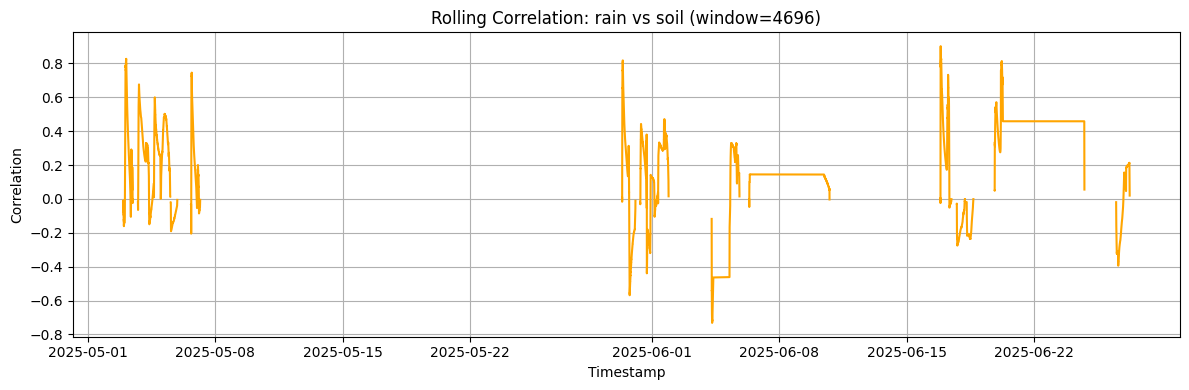

In [36]:
# ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: ‡∏ñ‡πâ‡∏≤ sampling ‡∏ó‡∏∏‡∏Å 10 ‡∏ô‡∏≤‡∏ó‡∏µ ‚Üí 48 ‡∏à‡∏∏‡∏î = 8 ‡∏ä‡∏±‡πà‡∏ß‡πÇ‡∏°‡∏á
df = df_val.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

rolling_corr = df['rain'].rolling(window_size*8).corr(df['soil'])

plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], rolling_corr, color='orange')
plt.title(f"Rolling Correlation: rain vs soil (window={window_size*8})")
plt.xlabel("Timestamp")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

## histogram

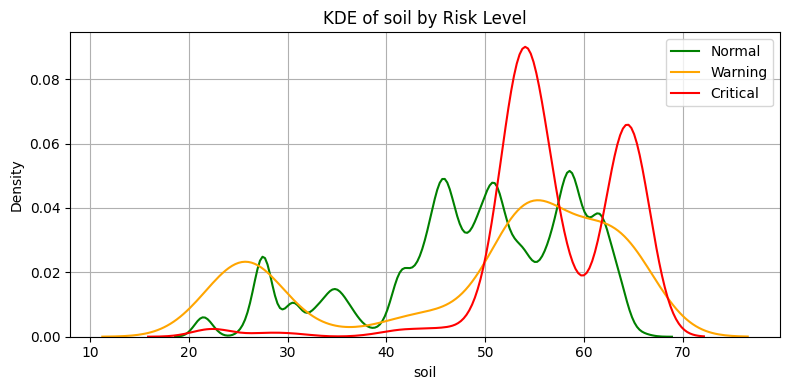

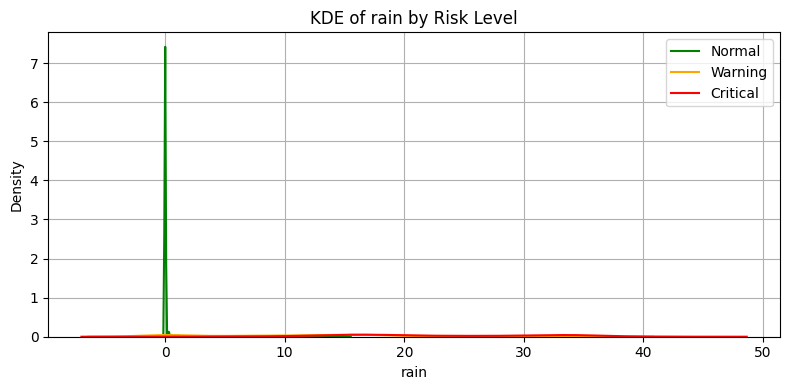

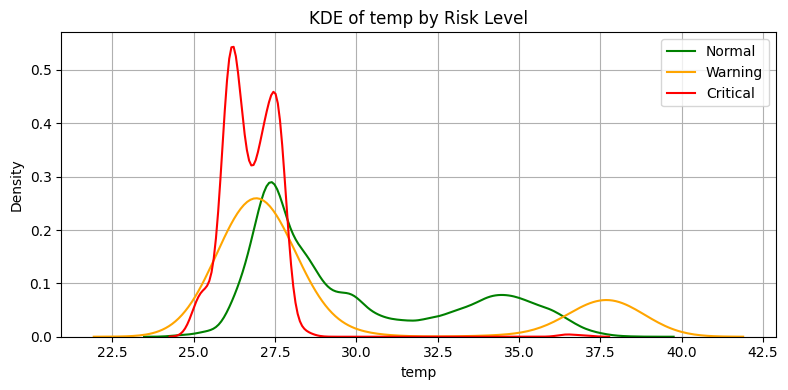

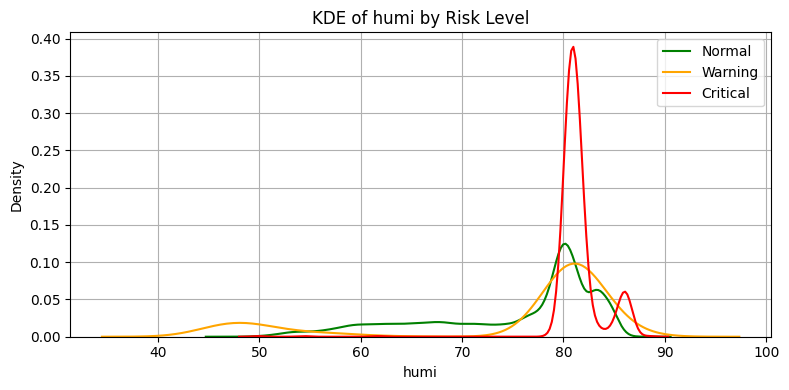

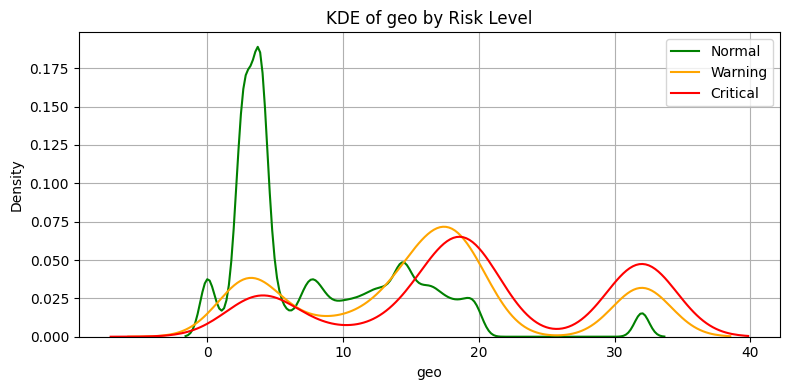

In [37]:
for col in feature_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Normal'][col], label='Normal', color='green')
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Warning'][col], label='Warning', color='orange')
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Critical'][col], label='Critical', color='red')
    plt.title(f"KDE of {col} by Risk Level")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Box Plot feature by risk

C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_24472\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

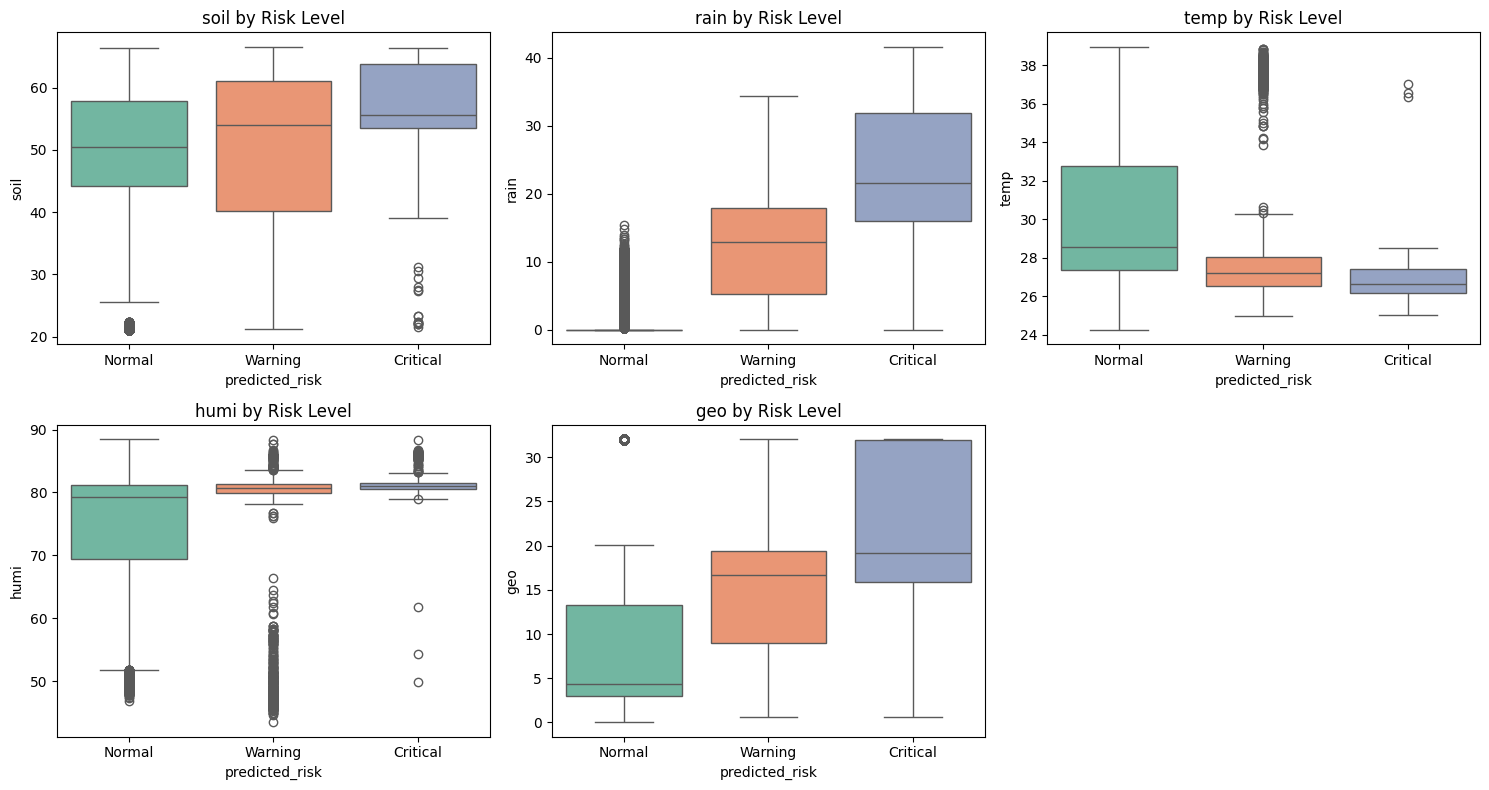

In [38]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        x='predicted_risk',
        y=col,
        data=df_val,
        order=['Normal', 'Warning', 'Critical'],  # üîß fix order here
        palette='Set2'
    )
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()


## Time Series

In [39]:
df['timestamp'].min()

Timestamp('2025-05-02 11:42:00.384119')

In [40]:
df['timestamp'].max()

Timestamp('2025-06-29 20:26:13.090000')

In [41]:
if 'timestamp' in df_val.columns:
    df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
    df_val_sorted = df_val.sort_values('timestamp')

    plt.figure(figsize=(12,5))
    plt.plot(df_val_sorted['timestamp'], df_val_sorted['anomaly_score'], color='black', label='Anomaly Score')
    plt.axhline(warn_thresh, color='orange', linestyle='--', label='Warning')
    plt.axhline(crit_thresh, color='red', linestyle='--', label='Critical')
    plt.title('Anomaly Score over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [42]:

df_results = df_val
df_results['date'] = pd.to_datetime(df_results['timestamp']).dt.date

risk_order = ['Critical', 'Normal', 'Warning']

alerts_per_day = df_results.groupby(['date', 'predicted_risk']).size().unstack(fill_value=0)

for risk in risk_order:
    if risk not in alerts_per_day.columns:
        alerts_per_day[risk] = 0

alerts_per_day = alerts_per_day[risk_order]

colors = ['red', 'green', 'orange']

alerts_per_day.plot(kind='bar', stacked=True, figsize=(12,5), color=colors)

plt.title("Daily Anomaly Levels (Normal / Warning / Critical)")
plt.xlabel("Date")
plt.ylabel("Number of Sequences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [43]:

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥ df_rain ‡∏°‡∏µ 'timestamp' ‡πÅ‡∏•‡∏∞ 'rain_amount'

df_results['date'] = pd.to_datetime(df_results['timestamp']).dt.date

# ‡∏£‡∏ß‡∏°‡∏õ‡∏£‡∏¥‡∏°‡∏≤‡∏ì‡∏ù‡∏ô‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô (sum)
rain_per_day = df_results.groupby('date')['rain'].mean()

# plot ‡∏Å‡∏£‡∏≤‡∏ü‡πÅ‡∏ó‡πà‡∏á‡∏õ‡∏£‡∏¥‡∏°‡∏≤‡∏ì‡∏ù‡∏ô‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô
plt.figure(figsize=(12,5))
rain_per_day.plot(kind='bar', color='blue')

plt.title("Daily Rainfall Amount")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


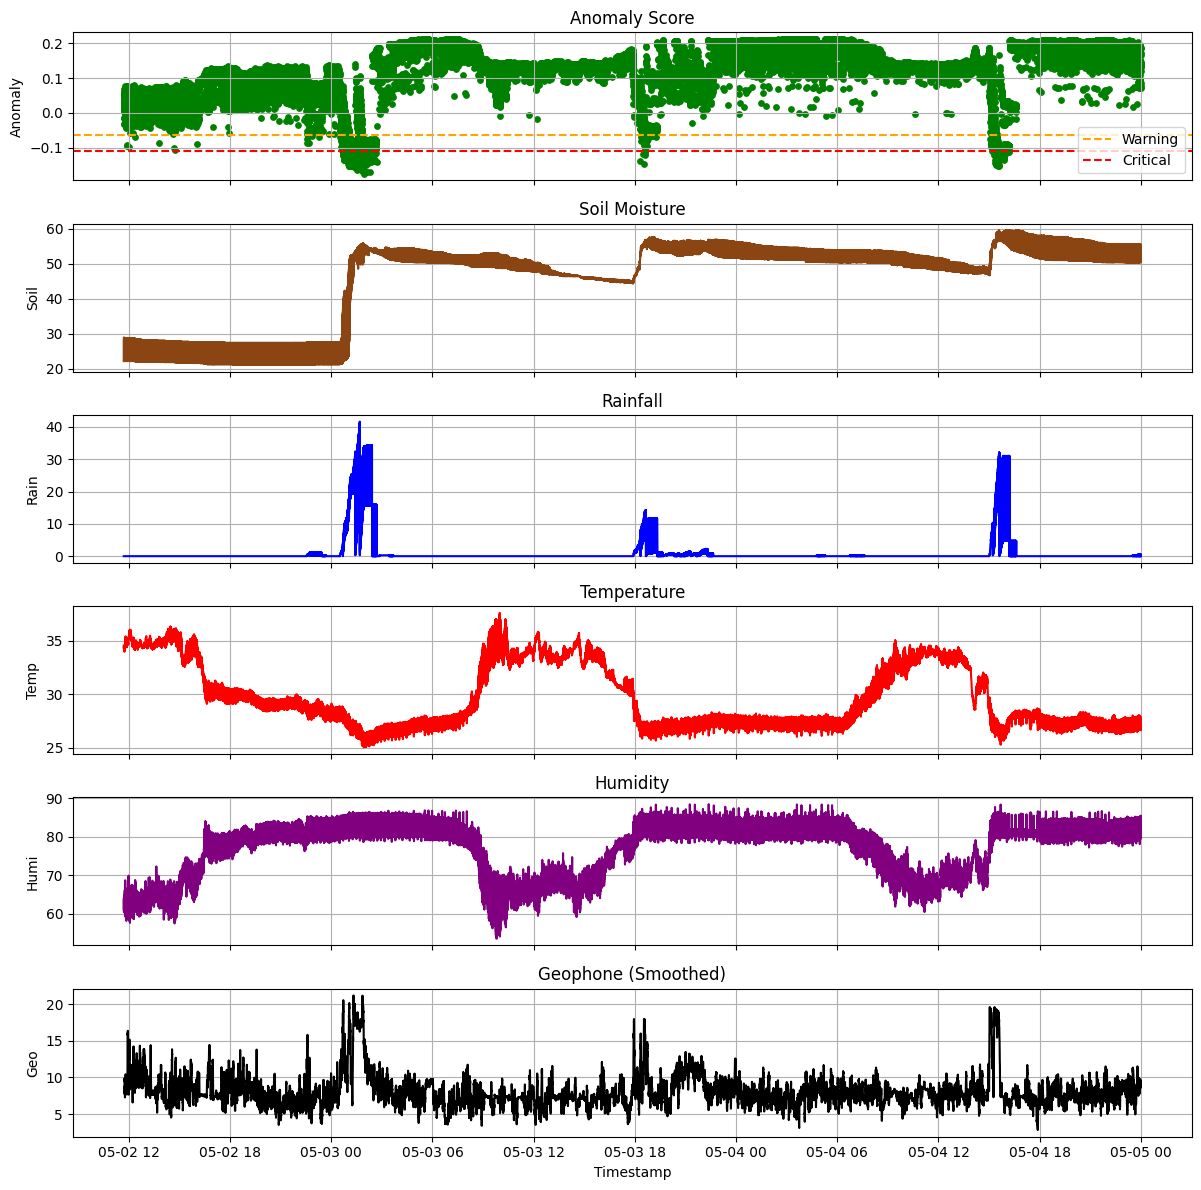

In [44]:
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
df_dev = df_val.set_index('timestamp').sort_index()
df_range = df_dev.loc["2025-05-02":"2025-05-04"]

# ‡∏™‡∏£‡πâ‡∏≤‡∏á subplot 6 ‡πÅ‡∏ñ‡∏ß
fig, axs = plt.subplots(6, 1, figsize=(12, 12), sharex=True)

# Plot 1: Anomaly Score
axs[0].scatter(df_range.index, df_range['anomaly_score'], color='green', s=15)
axs[0].axhline(y=warn_thresh, color='orange', linestyle='--', label='Warning')
axs[0].axhline(y=crit_thresh, color='red', linestyle='--', label='Critical')
axs[0].set_ylabel("Anomaly")
axs[0].set_title("Anomaly Score")
axs[0].legend()
axs[0].grid(True)

# Plot 2: Soil
axs[1].plot(df_range.index, df_range['soil'], color='saddlebrown')
axs[1].set_ylabel("Soil")
axs[1].set_title("Soil Moisture")
axs[1].grid(True)

# Plot 3: Rain
axs[2].plot(df_range.index, df_range['rain'], color='blue')
axs[2].set_ylabel("Rain")
axs[2].set_title("Rainfall")
axs[2].grid(True)

# Plot 4: Temp
axs[3].plot(df_range.index, df_range['temp'], color='red')
axs[3].set_ylabel("Temp")
axs[3].set_title("Temperature")
axs[3].grid(True)

# Plot 5: Humi
axs[4].plot(df_range.index, df_range['humi'], color='purple')
axs[4].set_ylabel("Humi")
axs[4].set_title("Humidity")
axs[4].grid(True)

window_size = 20  # ‡∏•‡∏≠‡∏á‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏ï‡∏≤‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏° ‡πÄ‡∏ä‡πà‡∏ô 10, 50, 100
smoothed_geo = df_range['geo'].rolling(window=window_size).mean()

axs[5].plot(df_range.index, smoothed_geo, color='black')
axs[5].set_ylabel("Geo")
axs[5].set_title("Geophone (Smoothed)")
axs[5].grid(True)

plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()
